In [1]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
from sklearn import metrics

import tensorflow.keras

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

from scipy import linalg as scipy_linalg
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

import itertools


In [2]:
prosody_data = pd.read_csv('Prosodic_Features_MRH.csv',sep=",")
#prosody_data = pd.read_csv('prosodic_features_M2.csv',sep=",")

#expr = pd.read_csv(expr_file, sep="\t")
y = prosody_data['Hired3C'].values

#For MRH 
X = prosody_data.iloc[:, 6:].values
#For M2 X = prosody_data.iloc[:,16:].values

X = StandardScaler().fit_transform(X)
#X = MinMaxScaler().fit_transform(X)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(X)
X_pca = pca.transform(X)
principalDf = pd.DataFrame(data = X_pca , columns = ['PC1', 'PC2','PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'])
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-4.168954,-0.014177,-2.475345,-0.810887,0.158383,-1.744078,-0.390702,0.265557,0.664754,1.053833,0.852548,-1.198337,0.200078,-0.733525,-1.235043,0.103770,1.158145,-0.448472,-0.797882,-0.337419
1,-4.464238,-1.009904,-3.092034,-1.055293,0.230520,-2.541514,-0.267613,0.678307,0.507352,1.239577,0.995475,-1.702559,0.455357,-0.275823,0.053688,0.166703,1.432267,-0.266246,-0.718773,-0.078894
2,-3.358534,0.101685,-2.585497,0.410778,1.336423,-2.501500,-0.698387,-0.107751,0.624624,1.094850,0.804498,-1.841720,0.020714,0.410396,0.199692,-0.220403,1.292691,-0.223190,-0.220839,0.059957
3,0.865701,-2.990583,-3.409886,3.427491,1.778394,-1.202344,0.742876,-1.396202,1.127661,-2.928788,-0.275886,-2.670809,-0.624287,-0.108667,0.953210,1.146600,1.633886,-0.566277,0.950328,0.609874
4,1.506023,-3.118672,-3.273643,1.326754,1.733809,-1.359053,1.285821,-1.184057,0.794970,-2.643697,0.574298,-1.356919,-0.637018,-0.660165,1.174453,1.339938,1.470992,-0.388438,1.199386,-0.148554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,-1.722865,0.621413,-2.511901,3.169306,-2.441883,-1.714762,-0.227481,0.926876,-1.283814,0.087162,0.307397,0.515536,1.552995,0.432328,-0.029459,-0.957236,0.665806,-0.728804,0.637098,-0.351651
676,-2.157176,0.879941,-2.401855,1.721035,-2.208042,-2.682219,-0.636729,1.491810,-1.361853,0.804769,0.408123,0.674547,2.267871,0.250245,0.651272,-1.064504,0.207464,-0.407122,-0.113065,-0.125031
677,-2.407032,2.363606,-1.592129,4.621724,-3.687422,0.870559,1.078026,-1.171055,-1.566512,-2.676464,0.168668,0.383443,1.421384,1.610892,0.787190,-0.769477,0.922084,-0.664132,0.114650,-0.676490
678,-0.943823,3.709886,-0.265405,3.604097,-0.754180,-2.480952,-0.034924,1.060393,-0.914385,0.231078,0.813391,0.337747,1.709111,0.380993,0.315751,-0.862309,0.346130,-0.474628,-0.510269,-0.357449


In [4]:
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 10))

Variance of each component: [0.22143425 0.16851797 0.09213142 0.08800173 0.06151173 0.05784391
 0.03947719 0.02957104 0.02898775 0.02342824 0.02005332 0.01888711
 0.01755324 0.01516364 0.01337228 0.01257713 0.01059232 0.00898099
 0.00833444 0.00676403]

 Total Variance Explained: 94.3183721587


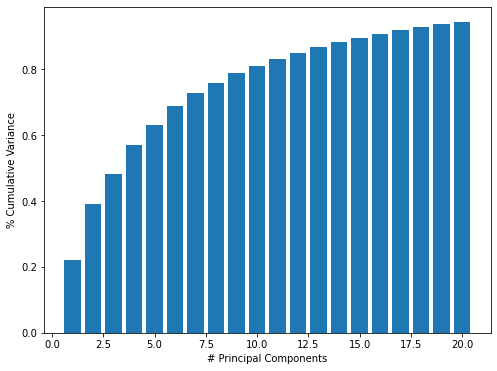

In [8]:
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,21), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance');

In [5]:
finalDf = pd.concat([principalDf, prosody_data[['Hired3C']]], axis = 1)
finalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,Hired3C
0,-4.168954,-0.014177,-2.475345,-0.810887,0.158383,-1.744078,-0.390702,0.265557,0.664754,1.053833,...,-1.198337,0.200078,-0.733525,-1.235043,0.103770,1.158145,-0.448472,-0.797882,-0.337419,1
1,-4.464238,-1.009904,-3.092034,-1.055293,0.230520,-2.541514,-0.267613,0.678307,0.507352,1.239577,...,-1.702559,0.455357,-0.275823,0.053688,0.166703,1.432267,-0.266246,-0.718773,-0.078894,1
2,-3.358534,0.101685,-2.585497,0.410778,1.336423,-2.501500,-0.698387,-0.107751,0.624624,1.094850,...,-1.841720,0.020714,0.410396,0.199692,-0.220403,1.292691,-0.223190,-0.220839,0.059957,1
3,0.865701,-2.990583,-3.409886,3.427491,1.778394,-1.202344,0.742876,-1.396202,1.127661,-2.928788,...,-2.670809,-0.624287,-0.108667,0.953210,1.146600,1.633886,-0.566277,0.950328,0.609874,1
4,1.506023,-3.118672,-3.273643,1.326754,1.733809,-1.359053,1.285821,-1.184057,0.794970,-2.643697,...,-1.356919,-0.637018,-0.660165,1.174453,1.339938,1.470992,-0.388438,1.199386,-0.148554,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,-1.722865,0.621413,-2.511901,3.169306,-2.441883,-1.714762,-0.227481,0.926876,-1.283814,0.087162,...,0.515536,1.552995,0.432328,-0.029459,-0.957236,0.665806,-0.728804,0.637098,-0.351651,0
676,-2.157176,0.879941,-2.401855,1.721035,-2.208042,-2.682219,-0.636729,1.491810,-1.361853,0.804769,...,0.674547,2.267871,0.250245,0.651272,-1.064504,0.207464,-0.407122,-0.113065,-0.125031,0
677,-2.407032,2.363606,-1.592129,4.621724,-3.687422,0.870559,1.078026,-1.171055,-1.566512,-2.676464,...,0.383443,1.421384,1.610892,0.787190,-0.769477,0.922084,-0.664132,0.114650,-0.676490,0
678,-0.943823,3.709886,-0.265405,3.604097,-0.754180,-2.480952,-0.034924,1.060393,-0.914385,0.231078,...,0.337747,1.709111,0.380993,0.315751,-0.862309,0.346130,-0.474628,-0.510269,-0.357449,0


In [6]:
def CreateModel(X_train, X_test, y_train, y_test):
    no_of_hiddenLayerNeurons = 80
    no_of_inNeurons = 20
    no_of_epochs = 50
    
    #Classifier 
    def baseline_model():
        # create model
        model = Sequential()
        model.add(Dense(no_of_hiddenLayerNeurons, input_dim=no_of_inNeurons, activation='relu'))
        model.add(Dense(no_of_hiddenLayerNeurons, input_dim=no_of_inNeurons, activation='relu'))
        model.add(Dense(no_of_hiddenLayerNeurons, input_dim=no_of_inNeurons, activation='relu'))
        model.add(Dense(no_of_hiddenLayerNeurons, input_dim=no_of_inNeurons, activation='relu'))
        model.add(Dense(no_of_hiddenLayerNeurons, input_dim=no_of_inNeurons, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))      
        # Compile model
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model
    
    
    y_21_test = []
    for i in y_test:
        if(i == 2):
            y_21_test.append(2)
        else:
            y_21_test.append(1)

    y_21_train = []
    for i in y_train:
        if(i == 2):
            y_21_train.append(2)
        else:
            y_21_train.append(1)

    
    X = X_train.values
    y = y_21_train
    
      
    #Classifier
    estimator = KerasClassifier(baseline_model, epochs=no_of_epochs, batch_size=5, verbose=0)
    estimator.fit(X, y)
    estimator.score(X, y)
    y_21_predict=estimator.predict(X_test)
    
    target_names = ['class 2', 'class 1']      
    print(classification_report(y_21_test,y_21_predict,target_names=target_names, zero_division=0))

    X_10_train = X_train.loc[y_train!= 2]
    X_10_test = X_test.loc[y_test!= 2]

    #select from y_train where y value is not 2
    y_10_train= []
    for i in y_train:
        if(i != 2):
            y_10_train.append(i)

    #select from y_test where y value is not 2
    y_10_test = []
    for i in y_test:
        if(i != 2):
            y_10_test.append(i)

    X = X_10_train.values
    y = y_10_train
    
        
    #Classifier 
    estimator = KerasClassifier(baseline_model, epochs=no_of_epochs, batch_size=5, verbose=0)
    estimator.fit(X, y)
    estimator.score(X, y)
    y_10_predict = estimator.predict(X_10_test)
    target_names = ['class 1', 'class 0']      
    print(classification_report(y_10_test,y_10_predict ,target_names=target_names, zero_division=0))

    y1=list(y_test)
    y2=list(y_21_predict)
    y3=list(y_10_predict)
    combined_Predictions = []
    k=0
    for (i,j) in zip(y1,y2):
        if(i!=2):
            combined_Predictions.append(y3[k])
            k=k+1
        else:
            combined_Predictions.append(j)
    #target_names = ['class 0', 'class 1', 'class 2']
    #print(classification_report(y_test,combined_Predictions ,target_names=target_names, zero_division=0))
    acc = accuracy_score(y_test, combined_Predictions, normalize=True)
    
    target_names = ['class 0', 'class 1', 'class 2']
    print(classification_report(y_test,combined_Predictions ,target_names=target_names, zero_division=0))
    acc = accuracy_score(y_test, combined_Predictions, normalize=True)
    
    

    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, combined_Predictions), annot = True,fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    #metrics.plot_roc_curve(estimator, X_test, y_test) 
    
    acc = accuracy_score(y_test, combined_Predictions, normalize=True)
    f1 =  f1_score(y_test, combined_Predictions, average='weighted')
    precision = precision_score(y_test, combined_Predictions,average='micro')
  
   
    return acc,f1,precision

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

     class 2       0.96      0.96      0.96        46
     class 1       0.91      0.91      0.91        22

    accuracy                           0.94        68
   macro avg       0.93      0.93      0.93        68
weighted avg       0.94      0.94      0.94        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        23

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

            

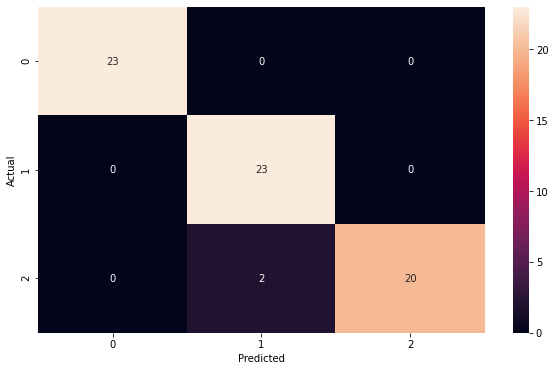

              precision    recall  f1-score   support

     class 2       1.00      1.00      1.00        46
     class 1       1.00      1.00      1.00        22

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        23

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       1.00      1.00      1.00        23
     class 2       1.00      1.00      1.00        22

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1

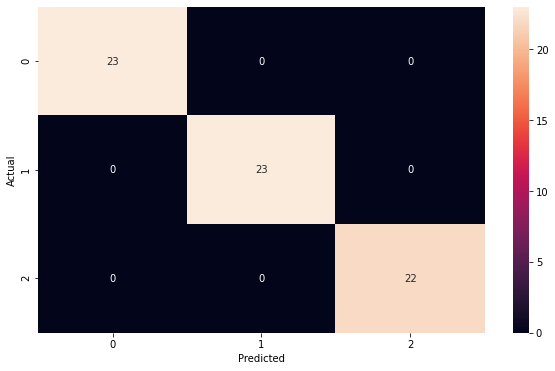

              precision    recall  f1-score   support

     class 2       1.00      0.98      0.99        46
     class 1       0.96      1.00      0.98        22

    accuracy                           0.99        68
   macro avg       0.98      0.99      0.98        68
weighted avg       0.99      0.99      0.99        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        23

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       1.00      1.00      1.00        23
     class 2       1.00      1.00      1.00        22

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1

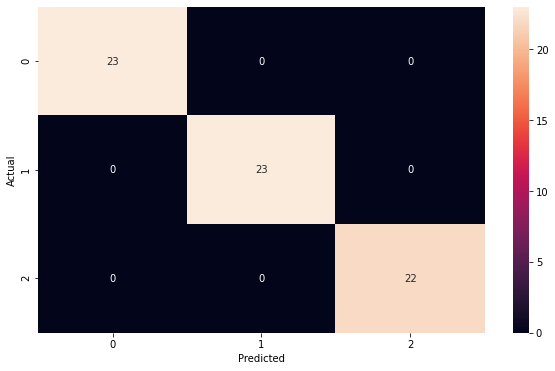

              precision    recall  f1-score   support

     class 2       1.00      0.98      0.99        46
     class 1       0.96      1.00      0.98        22

    accuracy                           0.99        68
   macro avg       0.98      0.99      0.98        68
weighted avg       0.99      0.99      0.99        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        23

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       1.00      1.00      1.00        23
     class 2       1.00      1.00      1.00        22

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1

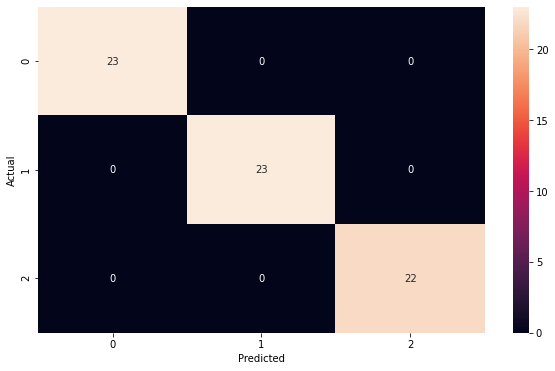

              precision    recall  f1-score   support

     class 2       0.92      1.00      0.96        46
     class 1       1.00      0.82      0.90        22

    accuracy                           0.94        68
   macro avg       0.96      0.91      0.93        68
weighted avg       0.95      0.94      0.94        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        23

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       0.85      1.00      0.92        23
     class 2       1.00      0.82      0.90        22

    accuracy                           0.94        68
   macro avg       0.95      0.94      0.94        68
weighted avg       0

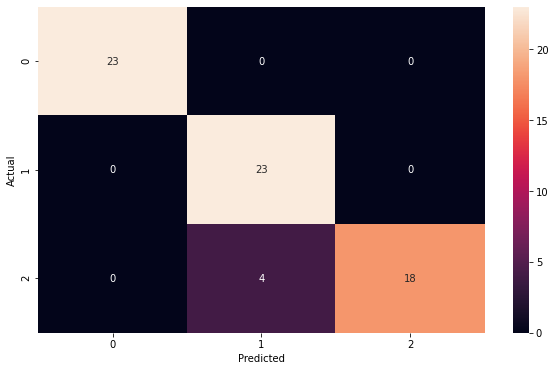

              precision    recall  f1-score   support

     class 2       1.00      1.00      1.00        45
     class 1       1.00      1.00      1.00        23

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        22

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       1.00      1.00      1.00        22
     class 2       1.00      1.00      1.00        23

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1

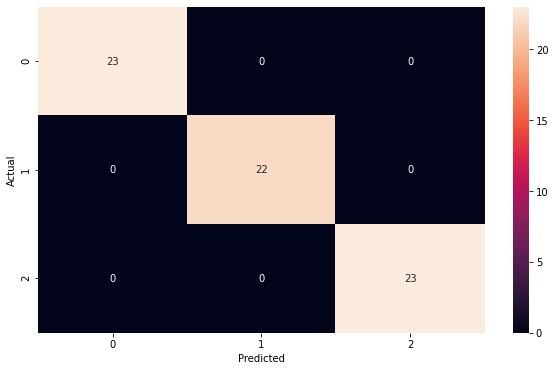

              precision    recall  f1-score   support

     class 2       0.96      0.98      0.97        45
     class 1       0.95      0.91      0.93        23

    accuracy                           0.96        68
   macro avg       0.96      0.95      0.95        68
weighted avg       0.96      0.96      0.96        68

              precision    recall  f1-score   support

     class 1       0.96      0.96      0.96        23
     class 0       0.95      0.95      0.95        22

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

              precision    recall  f1-score   support

     class 0       0.96      0.96      0.96        23
     class 1       0.88      0.95      0.91        22
     class 2       1.00      0.91      0.95        23

    accuracy                           0.94        68
   macro avg       0.94      0.94      0.94        68
weighted avg       0

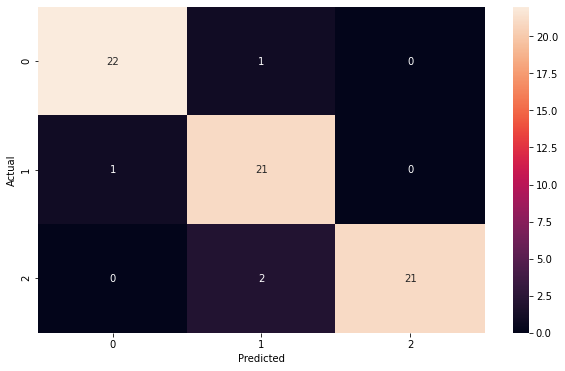

              precision    recall  f1-score   support

     class 2       1.00      0.96      0.98        45
     class 1       0.92      1.00      0.96        23

    accuracy                           0.97        68
   macro avg       0.96      0.98      0.97        68
weighted avg       0.97      0.97      0.97        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        22

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       1.00      1.00      1.00        22
     class 2       1.00      1.00      1.00        23

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1

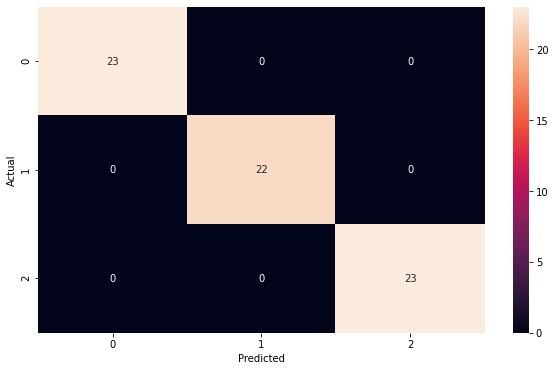

              precision    recall  f1-score   support

     class 2       0.96      0.96      0.96        45
     class 1       0.91      0.91      0.91        23

    accuracy                           0.94        68
   macro avg       0.93      0.93      0.93        68
weighted avg       0.94      0.94      0.94        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        22

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       0.92      1.00      0.96        22
     class 2       1.00      0.91      0.95        23

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0

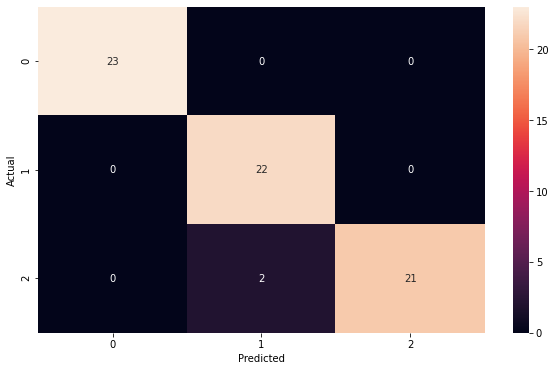

              precision    recall  f1-score   support

     class 2       0.98      1.00      0.99        45
     class 1       1.00      0.96      0.98        23

    accuracy                           0.99        68
   macro avg       0.99      0.98      0.98        68
weighted avg       0.99      0.99      0.99        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        22

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       0.96      1.00      0.98        22
     class 2       1.00      0.96      0.98        23

    accuracy                           0.99        68
   macro avg       0.99      0.99      0.99        68
weighted avg       0

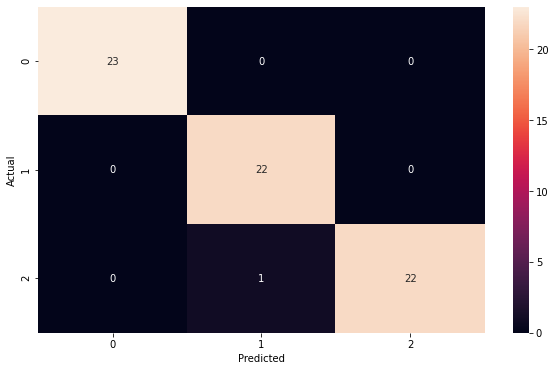

[97.05882352941177, 100.0, 100.0, 100.0, 94.11764705882352, 100.0, 94.11764705882352, 100.0, 97.05882352941177, 98.52941176470588]
CV Accuracy Score: 98.09% (+/- 2.28%)
CV  F1 Score: 98.09% (+/- 2.28%)
CV  Precision Score: 98.09% (+/- 2.28%)


In [7]:
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=12)
cv_acc_scores =[]
cv_f1_scores =[]
cv_precision_scores =[]
X= finalDf[['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20']]
y=finalDf['Hired3C']
for train_index, test_index in skf.split(X, y):


    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    
    acc,f1,precision = CreateModel( X_train, X_test, y_train, y_test)
    
    
    cv_acc_scores.append(acc*100)
    cv_f1_scores.append(f1*100)
    cv_precision_scores.append(precision*100)
   
print(cv_acc_scores ) 
print("CV Accuracy Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_acc_scores), np.std(cv_acc_scores)))
print("CV  F1 Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_f1_scores), np.std(cv_f1_scores)))
print("CV  Precision Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_precision_scores), np.std(cv_precision_scores)))
